In [2]:
%pip install -q motmetrics


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


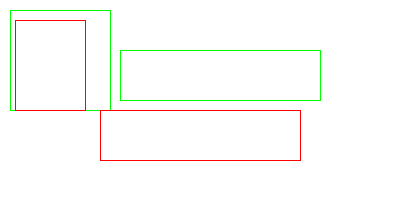

In [14]:
import numpy as np
from PIL import Image, ImageDraw

ground_truth = np.array(            # x, y, w, h
    [
        [10, 10, 100, 100],
        [120, 50, 200, 50]
    ]
)
hypothesis = np.array(
    [
        [15, 20, 70, 90],
        [100, 110, 200, 50]
    ]
)
# draw GT and HYP on the image
w, h = 400, 200
img = Image.fromarray(np.ones(shape=(h, w, 3), dtype=np.uint8)*255)
draw = ImageDraw.Draw(img)
for gt in ground_truth:
    ltrb  = *gt[:2], *(gt[:2] + gt[2:]) # left, top, right, bottom rectangle coordinates
    draw.rectangle(ltrb, outline=(0,255,0))
for hyp in hypothesis:
    ltrb  = *hyp[:2], *(hyp[:2] + hyp[2:]) # left, top, right, bottom rectangle coordinates
    draw.rectangle(ltrb, outline=(255,0,0))
img 

In [28]:
import motmetrics as mm
# the code below actually computes 1 - IoU, as for 'distance' metrics, smaller is better
# in consequence, max_iou is 1 - iou_threshold
mm.distances.iou_matrix(ground_truth, hypothesis)

array([[0.37, 1.  ],
       [1.  , 1.  ]])